In [2]:
from keras.datasets import mnist
import keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.
/Users/Selina/anaconda/envs/python3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


## 1. Preprocess

In [3]:
import numpy as np
import matplotlib

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1/6, stratify=y_train, random_state=0)
print(X_train.shape, 'train samples')
print(X_val.shape, 'test samples')

(50000, 784) train samples
(10000, 784) test samples


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.grid_search import GridSearchCV

/Users/Selina/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Selina/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Vinalla

In [49]:
#### Best Vinalla ###
model = Sequential([
            Dense(32,input_shape=(784,)),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(10),
            Activation('softmax')])
model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=60, verbose=1, validation_data=(X_val,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 4s 72us/step - loss: 0.5308 - acc: 0.8517 - val_loss: 0.2722 - val_acc: 0.9235
Epoch 2/60
50000/50000 [==============================] - 2s 35us/step - loss: 0.2393 - acc: 0.9310 - val_loss: 0.2158 - val_acc: 0.9410
Epoch 3/60
50000/50000 [==============================] - 2s 36us/step - loss: 0.1939 - acc: 0.9444 - val_loss: 0.1887 - val_acc: 0.9463
Epoch 4/60
50000/50000 [==============================] - 2s 39us/step - loss: 0.1670 - acc: 0.9508 - val_loss: 0.1766 - val_acc: 0.9518
Epoch 5/60
50000/50000 [==============================] - 2s 39us/step - loss: 0.1487 - acc: 0.9569 - val_loss: 0.1632 - val_acc: 0.9527
Epoch 6/60
50000/50000 [==============================] - 2s 41us/step - loss: 0.1350 - acc: 0.9597 - val_loss: 0.1523 - val_acc: 0.9560
Epoch 7/60
50000/50000 [==============================] - 2s 39us/step - loss: 0.1228 - acc: 0.9637 - val_loss: 0.1466 - val_acc

50000/50000 [==============================] - 2s 36us/step - loss: 0.0079 - acc: 0.9974 - val_loss: 0.1904 - val_acc: 0.9670


In [55]:
score = model.evaluate(X_val, y_val, verbose=0)
print("loss function on validation set: {}".format(score[0]))
print("accuracy function on validation set: {}".format(score[1]))

loss function on validation set: 0.19038974158683997
accuracy function on validation set: 0.967


In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 32)                25120     
_________________________________________________________________
activation_115 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_116 (Dense)            (None, 32)                1056      
_________________________________________________________________
activation_116 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_117 (Dense)            (None, 10)                330       
_________________________________________________________________
activation_117 (Activation)  (None, 10)                0         
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Text(0,0.5,'loss')

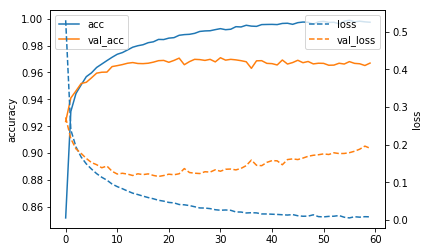

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [6]:
###Dense layer with 64 units

model = Sequential([
            Dense(64,input_shape=(784,)),
            Activation('relu'),
            Dense(64),
            Activation('relu'),
            Dense(10),
            Activation('softmax')])
model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=60, verbose=1, validation_data=(X_val,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 4s 84us/step - loss: 0.4372 - acc: 0.8761 - val_loss: 0.2253 - val_acc: 0.9365
Epoch 2/60
50000/50000 [==============================] - 3s 57us/step - loss: 0.1928 - acc: 0.9445 - val_loss: 0.1665 - val_acc: 0.9519
Epoch 3/60
50000/50000 [==============================] - 2s 46us/step - loss: 0.1432 - acc: 0.9581 - val_loss: 0.1338 - val_acc: 0.9612
Epoch 4/60
50000/50000 [==============================] - 2s 44us/step - loss: 0.1151 - acc: 0.9657 - val_loss: 0.1201 - val_acc: 0.9657
Epoch 5/60
50000/50000 [==============================] - 2s 45us/step - loss: 0.0958 - acc: 0.9713 - val_loss: 0.1136 - val_acc: 0.9660
Epoch 6/60
50000/50000 [==============================] - 3s 55us/step - loss: 0.0797 - acc: 0.9764 - val_loss: 0.1035 - val_acc: 0.9708
Epoch 7/60
50000/50000 [==============================] - 2s 48us/step - loss: 0.0678 - acc: 0.9797 - val_loss: 0.0921 - val_acc

In [7]:
score = model.evaluate(X_val, y_val, verbose=0)
print("loss function on validation set: {}".format(score[0]))
print("accuracy function on validation set: {}".format(score[1]))

loss function on validation set: 0.12505630256053263
accuracy function on validation set: 0.9791


Text(0,0.5,'loss')

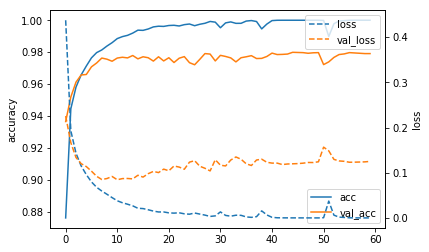

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [11]:

model = Sequential([
            Dense(128,input_shape=(784,)),
            Activation('relu'),
            Dense(128),
            Activation('relu'),
            Dense(10),
            Activation('softmax')])
model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=30, verbose=1, validation_data=(X_val,y_val))

score = model.evaluate(X_val, y_val, verbose=0)
print("loss function on validation set: {}".format(score[0]))
print("accuracy function on validation set: {}".format(score[1]))


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 65us/step - loss: 0.3565 - acc: 0.9010 - val_loss: 0.1752 - val_acc: 0.9513
Epoch 2/30
50000/50000 [==============================] - 3s 52us/step - loss: 0.1459 - acc: 0.9563 - val_loss: 0.1232 - val_acc: 0.9668
Epoch 3/30
50000/50000 [==============================] - 3s 52us/step - loss: 0.1008 - acc: 0.9698 - val_loss: 0.1171 - val_acc: 0.9653
Epoch 4/30
50000/50000 [==============================] - 3s 53us/step - loss: 0.0756 - acc: 0.9772 - val_loss: 0.0975 - val_acc: 0.9721
Epoch 5/30
50000/50000 [==============================] - 3s 53us/step - loss: 0.0582 - acc: 0.9824 - val_loss: 0.0842 - val_acc: 0.9749
Epoch 6/30
50000/50000 [==============================] - 3s 52us/step - loss: 0.0485 - acc: 0.9852 - val_loss: 0.0790 - val_acc: 0.9768
Epoch 7/30
50000/50000 [==============================] - 3s 53us/step - loss: 0.0378 - acc: 0.9882 - val_loss: 0.0820 - val_acc

Text(0,0.5,'loss')

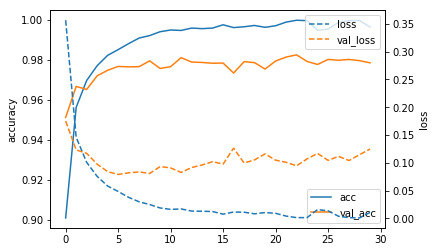

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

Dense layer with 64 units perform the best with 0.9791 accuarcy on validation set.


In the learning plot of vinalla model, notice that though train loss function is decreasing all the time, we have validation loss increasing after 20 epoch. Although our val_accuracy almost stays the same, the loss function of validation indicates an evidence of overfit.

## Drop Out

In [65]:
from keras.layers import Dropout
model = Sequential([
            Dense(32,input_shape=(784,)),
            Activation('relu'),
            Dropout(0.5),
            Dense(32),
            Activation('relu'),
            Dense(10),
            Dropout(0.5),
            Activation('softmax')])
model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=10, verbose=1, validation_data=(X_val,y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 1.5918 - acc: 0.4206 - val_loss: 0.5316 - val_acc: 0.9010
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 1.2991 - acc: 0.5037 - val_loss: 0.3757 - val_acc: 0.9209
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 1.2345 - acc: 0.5208 - val_loss: 0.3157 - val_acc: 0.9289
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 1.2157 - acc: 0.5256 - val_loss: 0.3089 - val_acc: 0.9301
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 1.1958 - acc: 0.5255 - val_loss: 0.2765 - val_acc: 0.9354
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 1.1803 - acc: 0.5300 - val_loss: 0.2901 - val_acc: 0.9353
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 1.1813 - acc: 0.5293 - val_loss: 0.2539 - val_acc

In [66]:
score = model.evaluate(X_val, y_val, verbose=0)
print("loss function on validation set: {}".format(score[0]))
print("accuracy function on validation set: {}".format(score[1]))

loss function on validation set: 0.24644227361679077
accuracy function on validation set: 0.9434


In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 32)                25120     
_________________________________________________________________
activation_126 (Activation)  (None, 32)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 32)                1056      
_________________________________________________________________
activation_127 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_128 (Dense)            (None, 10)                330       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
__________

Text(0,0.5,'loss')

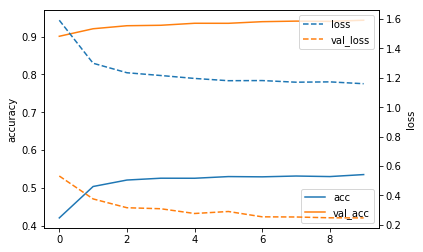

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

From the learning curve, we know that validation accuracy have the increasing trend alone with train accuracy, unlike the learning curve in vinalla model which is prone to overfitting.

In [13]:
from keras.layers import Dropout
model = Sequential([
            Dense(64,input_shape=(784,)),
            Activation('relu'),
            Dropout(0.5),
            Dense(64),
            Activation('relu'),
            Dense(10),
            Dropout(0.5),
            Activation('softmax')])
model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=10, verbose=1, validation_data=(X_val,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 69us/step - loss: 1.4191 - acc: 0.4727 - val_loss: 0.3755 - val_acc: 0.9175
Epoch 2/10
50000/50000 [==============================] - 2s 43us/step - loss: 1.1598 - acc: 0.5414 - val_loss: 0.2943 - val_acc: 0.9308
Epoch 3/10
50000/50000 [==============================] - 2s 49us/step - loss: 1.1097 - acc: 0.5514 - val_loss: 0.2340 - val_acc: 0.9429
Epoch 4/10
50000/50000 [==============================] - 3s 57us/step - loss: 1.0824 - acc: 0.5580 - val_loss: 0.2121 - val_acc: 0.9472
Epoch 5/10
50000/50000 [==============================] - 2s 47us/step - loss: 1.0727 - acc: 0.5564 - val_loss: 0.2161 - val_acc: 0.9504
Epoch 6/10
50000/50000 [==============================] - 2s 45us/step - loss: 1.0518 - acc: 0.5611 - val_loss: 0.1896 - val_acc: 0.9529
Epoch 7/10
50000/50000 [==============================] - 2s 46us/step - loss: 1.0424 - acc: 0.5645 - val_loss: 0.1815 - val_acc

loss function on validation set: 0.16479392840862275
accuracy function on validation set: 0.9596


Text(0,0.5,'loss')

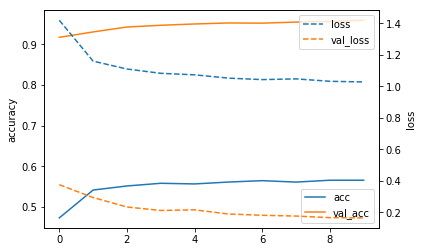

In [14]:
score = model.evaluate(X_val, y_val, verbose=0)
print("loss function on validation set: {}".format(score[0]))
print("accuracy function on validation set: {}".format(score[1]))
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 1.2671 - acc: 0.5115 - val_loss: 0.2595 - val_acc: 0.9409
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 1.0618 - acc: 0.5601 - val_loss: 0.1785 - val_acc: 0.9560
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 1.0226 - acc: 0.5696 - val_loss: 0.1538 - val_acc: 0.9633
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 1.0006 - acc: 0.5744 - val_loss: 0.1309 - val_acc: 0.9689
Epoch 5/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.9863 - acc: 0.5751 - val_loss: 0.1077 - val_acc: 0.9746
Epoch 6/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.9732 - acc: 0.5796 - val_loss: 0.0994 - val_acc: 0.9762
Epoch 7/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.9624 - acc: 0.5787 - val_loss: 0.0982 - val_acc

Text(0,0.5,'loss')

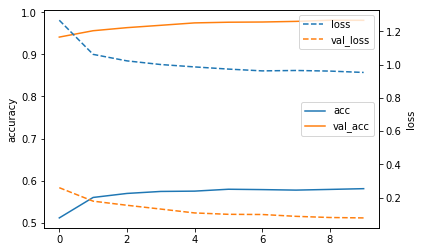

In [16]:
from keras.layers import Dropout
model = Sequential([
            Dense(128,input_shape=(784,)),
            Activation('relu'),
            Dropout(0.5),
            Dense(128),
            Activation('relu'),
            Dense(10),
            Dropout(0.5),
            Activation('softmax')])
model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=10, verbose=1, validation_data=(X_val,y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print("loss function on validation set: {}".format(score[0]))
print("accuracy function on validation set: {}".format(score[1]))
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

We choose model with dropout rate 0.5, dense layer 128.
Since validation score for drop out (0.9807) is greater than score of vinalla (0.9791),
we choose train the drop out model on entire train dataset to evaluate the final test score.

In [8]:
from keras.layers import Dropout
## select the better model run on entire train dataset for evaluation
# reload the data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential([
            Dense(128,input_shape=(784,)),
            Activation('relu'),
            Dropout(0.5),
            Dense(128),
            Activation('relu'),
            Dense(10),
            Dropout(0.5),
            Activation('softmax')])

model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=60, verbose=1, validation_split=.1)



60000 train samples
10000 test samples
Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 4s 66us/step - loss: 1.2797 - acc: 0.5106 - val_loss: 0.2337 - val_acc: 0.9468
Epoch 2/60
54000/54000 [==============================] - 3s 57us/step - loss: 1.0697 - acc: 0.5595 - val_loss: 0.1595 - val_acc: 0.9645
Epoch 3/60
54000/54000 [==============================] - 3s 53us/step - loss: 1.0390 - acc: 0.5651 - val_loss: 0.1365 - val_acc: 0.9655
Epoch 4/60
54000/54000 [==============================] - 3s 53us/step - loss: 1.0008 - acc: 0.5736 - val_loss: 0.1208 - val_acc: 0.9687
Epoch 5/60
54000/54000 [==============================] - 3s 53us/step - loss: 0.9935 - acc: 0.5733 - val_loss: 0.1090 - val_acc: 0.9737
Epoch 6/60
54000/54000 [==============================] - 3s 53us/step - loss: 0.9717 - acc: 0.5778 - val_loss: 0.1084 - val_acc: 0.9680
Epoch 7/60
54000/54000 [==============================] - 3s 53us/step - loss: 0.9679 - ac

Epoch 60/60
54000/54000 [==============================] - 3s 52us/step - loss: 0.8909 - acc: 0.5896 - val_loss: 0.0608 - val_acc: 0.9827
loss function on validation set: 0.07633006132193841
accuracy function on validation set: 0.9779


Text(0,0.5,'loss')

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print("loss function on validation set: {}".format(score[0]))
print("accuracy function on validation set: {}".format(score[1]))



loss function on validation set: 0.07633006132193841
accuracy function on validation set: 0.9779


Text(0,0.5,'loss')

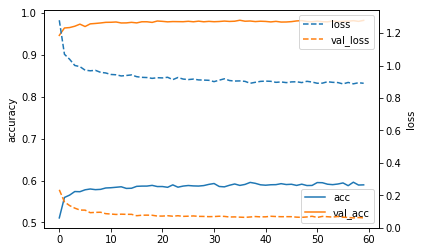

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")



accuracy function on validation set is 0.975, lower than validation dataset heldout. The plot shows the overall trend of accuracy increasing with loss function decreasing. 